# Evaluation Notebook

Jan, Nina & Laura

In [12]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import subprocess

### Create testfields
We create one testfield per stencil_name and domain size (option --create_field = True). After creation the fields are saved in the folder testfields and can be accessed by the option --field_name.

TODO: A smart way to create easily all Testfields in one line?

In [17]:
stencil_name_list = [
        "test",
        "laplacian1d", 
        "laplacian2d",
        "laplacian3d",
        "FMA",
       "lapoflap1d",
        "lapoflap2d",
        "lapoflap3d",
        "test_gt4py",
    ]

backend_list = ["numpy", "numba_vector_function", "numba_vector_decorator", "numba_loop", "numba_stencil", "gt4py"]


In [49]:
#if somebody knows how to remove the b and \n 
for x in stencil_name_list:
    
    bashCommand=f"python3 stencil_main_validation.py --nx 32 --ny 32 --nz 32 --stencil_name {x} --backend numpy --create_field True --field_name {x}"
    process = subprocess.Popen(bashCommand.split(), stdout=subprocess.PIPE,stderr=subprocess.PIPE)
    output, error = process.communicate()
    
    print(output.decode("utf-8"))# <class 'str'>
    
    
    

New output field test saved.

New output field laplacian1d saved.

New output field laplacian2d saved.

New output field laplacian3d saved.

New output field FMA saved.

New output field lapoflap1d saved.

New output field lapoflap2d saved.

New output field lapoflap3d saved.




In [50]:
for x in stencil_name_list:
    print(x,':')
    for y in backend_list:
        bashCommand=f"python3 stencil_main_validation.py --nx 32 --ny 32 --nz 32 --stencil_name {x} --backend {y} --create_field False --field_name {x}"
        process = subprocess.Popen(bashCommand.split(), stdout=subprocess.PIPE)
        output, error = process.communicate()
        print(output.decode("utf-8"))

test :
Field validation for stencil test in backend numpy is: True.

Field validation for stencil test in backend numba_vector_function is: True.

Field validation for stencil test in backend numba_vector_decorator is: True.

Field validation for stencil test in backend numba_loop is: True.


Field validation for stencil test in backend gt4py is: True.

laplacian1d :
Field validation for stencil laplacian1d in backend numpy is: True.

Field validation for stencil laplacian1d in backend numba_vector_function is: True.


Field validation for stencil laplacian1d in backend numba_loop is: True.


Field validation for stencil laplacian1d in backend gt4py is: True.

laplacian2d :
Field validation for stencil laplacian2d in backend numpy is: True.

Field validation for stencil laplacian2d in backend numba_vector_function is: True.




KeyboardInterrupt: 

### Execute Stencil computation for evaluation
In this section the different stencils for the different domain sizes are calculated.


In [87]:
#Test Stencil 32 x 32 x 32
!python3 stencil_main.py --nx 32 --ny 32 --nz 32 --num_iter 50 --stencil_name test --backend numpy --df_name test --field_name test32 --create_field False --save_runtime True 


Total worktime: 0.001186370849609375 s. In 50 iteration(s) the average lapsed time for one run is 2.37274169921875e-05 +/- 2.916116500383687e-05 s
The average elapsed time of the first 10 run is 4.000663757324219e-05 and of the last 10 values is 1.971721649169922e-05
Result of field validation is: True
Runtime development saved in dataframe.


### Read out the dataframe and plot results
The program saves the evaluation data into a pandas dataframe (Name is defined with the option --df_name). Subsequently the df can be accessed for further processing within a jupyter notebook.

In [89]:
df_name = "test" #Name of df to evaluate
df = pd.read_pickle("eval/{}_result.pkl".format(df_name))
df.head(10)

,stencil_name,backend,nx,ny,nz,valid,field_name,num_iter,time_total,run_avg,run_stdev,run_first10,run_last10
0,test,numpy,32,32,32,True,test32,50,0.001084,0.000022,0.000024,0.000034,0.000017
1,test,numpy,32,32,32,True,test32,50,0.001171,0.000023,0.000028,0.000039,0.000020
2,test,numbajit,32,32,32,True,test32,50,0.000979,0.000020,0.000026,0.000036,0.000016
3,test,numbajit,32,32,32,True,test32,50,0.000950,0.000019,0.000022,0.000032,0.000016
4,test,numbajit,32,32,32,True,test32,50,0.001268,0.000025,0.000043,0.000052,0.000018
5,test,numbajit,32,32,32,True,test32,50,0.000957,0.000019,0.000024,0.000033,0.000016
6,test,numpy,32,32,32,True,test32,50,0.001186,0.000024,0.000029,0.000040,0.000020


In [8]:
df_name = "planb" #Name of df to evaluate
df = pd.read_pickle("eval/{}_result.pkl".format(df_name))
df.tail(10)

,stencil_name,backend,nx,ny,nz,valid,field_name,num_iter,time_total,run_avg,run_stdev,run_first10,run_last10,gt4py_backend,numba_parallel
33,lapoflap1d,numpy,32,32,32,-,test,5,0.000743,0.000149,0.000002,NaN,NaN,NaN,NaN
34,lapoflap1d,numba_loop,32,32,32,-,test,5,0.001079,0.000216,0.000045,NaN,NaN,NaN,NaN
35,lapoflap2d,numba_loop,32,32,32,-,test,5,0.003030,0.000606,0.000002,NaN,NaN,NaN,NaN
36,lapoflap3d,numba_loop,32,32,32,-,test,5,0.003760,0.000752,0.000003,NaN,NaN,NaN,NaN
37,laplacian3d,numba_loop,32,32,32,-,test,5,0.000232,0.000046,0.000003,NaN,NaN,NaN,NaN
38,laplacian2d,numba_loop,32,32,32,-,test,5,0.001768,0.000354,0.000010,NaN,NaN,NaN,NaN
39,laplacian2d,numba_loop,32,32,32,True,test,5,0.001578,0.000316,0.000002,NaN,NaN,NaN,NaN
40,laplacian2d,numba_vector_function,32,32,32,True,test,5,0.001786,0.000357,0.000012,NaN,NaN,NaN,NaN
41,laplacian2d,numba_vector_function,32,32,32,True,test,5,0.002249,0.000450,0.000068,NaN,NaN,NaN,NaN
42,laplacian2d,numba_vector_function,32,32,32,True,test,5,0.002268,0.000454,0.000060,NaN,NaN,numpy,1.0


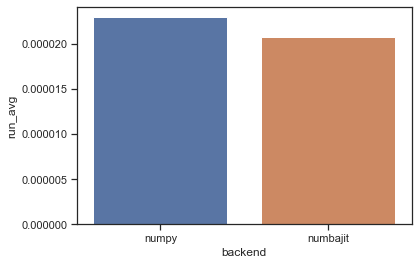

In [90]:
sns.set(style="ticks")

ax = sns.barplot('backend','run_avg',data=df, ci=None)

In [47]:
#Clear df on disk
df_name = "test"
os.remove("eval/{}_result.pkl".format(df_name))

### Evaluate Runtime
We suspect that different number of iterations will lead to different runtime developments.
This can be tested with the option --save_runtime. The df runtimedevelopment can afterwards be evaluated.

In [64]:
df_runtime = pd.read_pickle("eval/runtimedevelopment.pkl")
df_runtime.columns = ['runtime']
df_runtime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   runtime  50 non-null     float64
dtypes: float64(1)
memory usage: 528.0 bytes


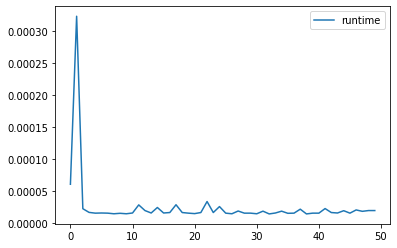

In [65]:
df_runtime.plot()